In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hospital-management-dataset/appointments.csv
/kaggle/input/hospital-management-dataset/billing.csv
/kaggle/input/hospital-management-dataset/patients.csv
/kaggle/input/hospital-management-dataset/doctors.csv
/kaggle/input/hospital-management-dataset/treatments.csv


# Import Libaries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Loading Data

In [3]:
appointments=pd.read_csv(r"/kaggle/input/hospital-management-dataset/appointments.csv")
billing=pd.read_csv(r"/kaggle/input/hospital-management-dataset/billing.csv")
doctors=pd.read_csv(r"/kaggle/input/hospital-management-dataset/doctors.csv")
patients=pd.read_csv(r"/kaggle/input/hospital-management-dataset/patients.csv")
treatments=pd.read_csv(r"/kaggle/input/hospital-management-dataset/treatments.csv")
print(appointments.head(5))
print(billing.head(5))
print(doctors.head(5))
print(patients.head(5))
print(treatments.head(5))

  appointment_id patient_id doctor_id appointment_date appointment_time  \
0           A001       P034      D009       2023-08-09         15:15:00   
1           A002       P032      D004       2023-06-09         14:30:00   
2           A003       P048      D004       2023-06-28          8:00:00   
3           A004       P025      D006       2023-09-01          9:15:00   
4           A005       P040      D003       2023-07-06         12:45:00   

  reason_for_visit     status  
0          Therapy  Scheduled  
1          Therapy    No-show  
2     Consultation  Cancelled  
3     Consultation  Cancelled  
4        Emergency    No-show  
  bill_id patient_id treatment_id   bill_date   amount payment_method  \
0    B001       P034         T001  2023-08-09  3941.97      Insurance   
1    B002       P032         T002  2023-06-09  4158.44      Insurance   
2    B003       P048         T003  2023-06-28  3731.55      Insurance   
3    B004       P025         T004  2023-09-01  4799.86      Insur

In [4]:
appointments.info()
billing.info()
doctors.info()
patients.info()
treatments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   appointment_id    200 non-null    object
 1   patient_id        200 non-null    object
 2   doctor_id         200 non-null    object
 3   appointment_date  200 non-null    object
 4   appointment_time  200 non-null    object
 5   reason_for_visit  200 non-null    object
 6   status            200 non-null    object
dtypes: object(7)
memory usage: 11.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bill_id         200 non-null    object 
 1   patient_id      200 non-null    object 
 2   treatment_id    200 non-null    object 
 3   bill_date       200 non-null    object 
 4   amount          200 non-null    float64
 5   payment_method  2

In [5]:
appointments.describe()
billing.describe()
doctors.describe()
patients.describe()
treatments.describe()


,cost
count,200.000000
mean,2756.249250
std,1298.125308
min,534.030000
25%,1563.412500
50%,2828.165000
75%,3836.627500
max,4973.630000


In [6]:
print(appointments.isnull().sum())
print(patients.isnull().sum())
print(billing.isnull().sum())
print(doctors.isnull().sum())
print(treatments.isnull().sum())

appointment_id      0
patient_id          0
doctor_id           0
appointment_date    0
appointment_time    0
reason_for_visit    0
status              0
dtype: int64
patient_id            0
first_name            0
last_name             0
gender                0
date_of_birth         0
contact_number        0
address               0
registration_date     0
insurance_provider    0
insurance_number      0
email                 0
dtype: int64
bill_id           0
patient_id        0
treatment_id      0
bill_date         0
amount            0
payment_method    0
payment_status    0
dtype: int64
doctor_id           0
first_name          0
last_name           0
specialization      0
phone_number        0
years_experience    0
hospital_branch     0
email               0
dtype: int64
treatment_id      0
appointment_id    0
treatment_type    0
description       0
cost              0
treatment_date    0
dtype: int64


In [7]:
print("appointments columns:",appointments.columns.tolist())
print("patients columns:",patients.columns.tolist())
print("billing columns:",billing.columns.tolist())
print("doctors columns:",doctors.columns.tolist())
print("treatments columns:",treatments.columns.tolist())

appointments columns: ['appointment_id', 'patient_id', 'doctor_id', 'appointment_date', 'appointment_time', 'reason_for_visit', 'status']
patients columns: ['patient_id', 'first_name', 'last_name', 'gender', 'date_of_birth', 'contact_number', 'address', 'registration_date', 'insurance_provider', 'insurance_number', 'email']
billing columns: ['bill_id', 'patient_id', 'treatment_id', 'bill_date', 'amount', 'payment_method', 'payment_status']
doctors columns: ['doctor_id', 'first_name', 'last_name', 'specialization', 'phone_number', 'years_experience', 'hospital_branch', 'email']
treatments columns: ['treatment_id', 'appointment_id', 'treatment_type', 'description', 'cost', 'treatment_date']


In [8]:
merge_data = (
    appointments
    .merge(patients, on="patient_id")
    .merge(billing, on="patient_id")
    .merge(patients,on="patient_id")
    .merge(doctors,on="doctor_id")
    .merge(treatments,on="treatment_id")
)

print(merge_data.head(5))

  appointment_id_x patient_id doctor_id appointment_date appointment_time  \
0             A001       P034      D009       2023-08-09         15:15:00   
1             A001       P034      D009       2023-08-09         15:15:00   
2             A001       P034      D009       2023-08-09         15:15:00   
3             A002       P032      D004       2023-06-09         14:30:00   
4             A002       P032      D004       2023-06-09         14:30:00   

  reason_for_visit     status first_name_x last_name_x gender_x  ...  \
0          Therapy  Scheduled         Alex       Smith        F  ...   
1          Therapy  Scheduled         Alex       Smith        F  ...   
2          Therapy  Scheduled         Alex       Smith        F  ...   
3          Therapy    No-show         Alex       Moore        M  ...   
4          Therapy    No-show         Alex       Moore        M  ...   

  specialization  phone_number years_experience   hospital_branch  \
0     Pediatrics    7387087517     

# Feautre Engineering

In [9]:
print(merge_data.isnull().sum())

appointment_id_x        0
patient_id              0
doctor_id               0
appointment_date        0
appointment_time        0
reason_for_visit        0
status                  0
first_name_x            0
last_name_x             0
gender_x                0
date_of_birth_x         0
contact_number_x        0
address_x               0
registration_date_x     0
insurance_provider_x    0
insurance_number_x      0
email_x                 0
bill_id                 0
treatment_id            0
bill_date               0
amount                  0
payment_method          0
payment_status          0
first_name_y            0
last_name_y             0
gender_y                0
date_of_birth_y         0
contact_number_y        0
address_y               0
registration_date_y     0
insurance_provider_y    0
insurance_number_y      0
email_y                 0
first_name              0
last_name               0
specialization          0
phone_number            0
years_experience        0
hospital_bra

In [10]:
print(merge_data.columns)

Index(['appointment_id_x', 'patient_id', 'doctor_id', 'appointment_date',
       'appointment_time', 'reason_for_visit', 'status', 'first_name_x',
       'last_name_x', 'gender_x', 'date_of_birth_x', 'contact_number_x',
       'address_x', 'registration_date_x', 'insurance_provider_x',
       'insurance_number_x', 'email_x', 'bill_id', 'treatment_id', 'bill_date',
       'amount', 'payment_method', 'payment_status', 'first_name_y',
       'last_name_y', 'gender_y', 'date_of_birth_y', 'contact_number_y',
       'address_y', 'registration_date_y', 'insurance_provider_y',
       'insurance_number_y', 'email_y', 'first_name', 'last_name',
       'specialization', 'phone_number', 'years_experience', 'hospital_branch',
       'email', 'appointment_id_y', 'treatment_type', 'description', 'cost',
       'treatment_date'],
      dtype='object')


In [11]:
merge_data.fillna(0)

,appointment_id_x,patient_id,doctor_id,appointment_date,appointment_time,reason_for_visit,status,first_name_x,last_name_x,gender_x,...,specialization,phone_number,years_experience,hospital_branch,email,appointment_id_y,treatment_type,description,cost,treatment_date
0,A001,P034,D009,2023-08-09,15:15:00,Therapy,Scheduled,Alex,Smith,F,...,Pediatrics,7387087517,26,Central Hospital,dr.sarah.smith@hospital.com,A001,Chemotherapy,Basic screening,3941.97,2023-08-09
1,A001,P034,D009,2023-08-09,15:15:00,Therapy,Scheduled,Alex,Smith,F,...,Pediatrics,7387087517,26,Central Hospital,dr.sarah.smith@hospital.com,A043,X-Ray,Advanced protocol,3207.25,2023-03-29
2,A001,P034,D009,2023-08-09,15:15:00,Therapy,Scheduled,Alex,Smith,F,...,Pediatrics,7387087517,26,Central Hospital,dr.sarah.smith@hospital.com,A093,X-Ray,Basic screening,1955.17,2023-04-09
3,A002,P032,D004,2023-06-09,14:30:00,Therapy,No-show,Alex,Moore,M,...,Pediatrics,6594221991,28,Central Hospital,dr.david.jones@hospital.com,A002,MRI,Advanced protocol,4158.44,2023-06-09
4,A002,P032,D004,2023-06-09,14:30:00,Therapy,No-show,Alex,Moore,M,...,Pediatrics,6594221991,28,Central Hospital,dr.david.jones@hospital.com,A047,ECG,Advanced protocol,1454.20,2023-05-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,A199,P017,D001,2023-05-01,12:45:00,Follow-up,Completed,Jane,Jones,M,...,Dermatology,8322010158,17,Westside Clinic,dr.david.taylor@hospital.com,A199,Chemotherapy,Basic screening,1472.17,2023-05-01
998,A200,P007,D005,2023-12-30,10:15:00,Consultation,Cancelled,Alex,Johnson,F,...,Dermatology,9118538547,26,Central Hospital,dr.sarah.taylor@hospital.com,A095,X-Ray,Advanced protocol,2097.48,2023-05-09
999,A200,P007,D005,2023-12-30,10:15:00,Consultation,Cancelled,Alex,Johnson,F,...,Dermatology,9118538547,26,Central Hospital,dr.sarah.taylor@hospital.com,A145,X-Ray,Advanced protocol,2120.61,2023-11-11
1000,A200,P007,D005,2023-12-30,10:15:00,Consultation,Cancelled,Alex,Johnson,F,...,Dermatology,9118538547,26,Central Hospital,dr.sarah.taylor@hospital.com,A180,Chemotherapy,Advanced protocol,3228.14,2023-01-07


In [12]:
print(merge_data['status'].value_counts())


status
No-show      283
Scheduled    259
Cancelled    251
Completed    209
Name: count, dtype: int64


# Data Framing For Time

In [13]:
merge_data["appointment_date"]=pd.to_datetime(merge_data["appointment_date"])
merge_data["year"]=merge_data["appointment_date"].dt.year
merge_data["month"]=merge_data["appointment_date"].dt.month
merge_data["day"]=merge_data["appointment_date"].dt.day
merge_data["days_of_week"]=merge_data["appointment_date"].dt.dayofweek
merge_data["hour"]=merge_data["appointment_date"].dt.hour
merge_data["is_weekend"]=merge_data["days_of_week"]>=5
merge_data["quarter"]=merge_data["appointment_date"].dt.quarter

print(merge_data[['appointment_date','year','day','days_of_week','hour','is_weekend','quarter']].head())

  appointment_date  year  day  days_of_week  hour  is_weekend  quarter
0       2023-08-09  2023    9             2     0       False        3
1       2023-08-09  2023    9             2     0       False        3
2       2023-08-09  2023    9             2     0       False        3
3       2023-06-09  2023    9             4     0       False        2
4       2023-06-09  2023    9             4     0       False        2


Seasonal Calculation-Analysis

In [14]:
def get_season(month):
    if month in[12,1,2]:
        return "winter"
    elif month in[3,4,5]:
        return "Summer"
    elif month in [6,7,8]:
        return "spring"
    else:
        return "Autumn"

merge_data['season']=merge_data["appointment_date"].dt.month.apply(get_season)

In [15]:
print(merge_data['season'].value_counts())

season
Summer    309
spring    233
winter    233
Autumn    227
Name: count, dtype: int64


In [16]:
def days_of_week(day):
    if day in[1,2,3,4,5]:
        return "weekdays"
    else:
        return "Weekend"

merge_data['days']=merge_data["appointment_date"].dt.day.apply(days_of_week)

print(merge_data['days'].value_counts())

days
Weekend     882
weekdays    120
Name: count, dtype: int64


In [17]:
def year(month):
    if month in[1,2,3,4,5]:
        return "1st half"
    else:
        return "2nd half"

merge_data['year']=merge_data["appointment_date"].dt.month.apply(year)

print(merge_data['year'].value_counts())

year
2nd half    526
1st half    476
Name: count, dtype: int64


In [18]:
def is_weekend(is_weekend):
    if is_weekend in[6,7]:
        return "weekend"
    else:
        return "weekdays"

merge_data['year']=merge_data["appointment_date"].dt.day.apply(year)

print(merge_data['year'].value_counts())

year
2nd half    882
1st half    120
Name: count, dtype: int64


# EDA

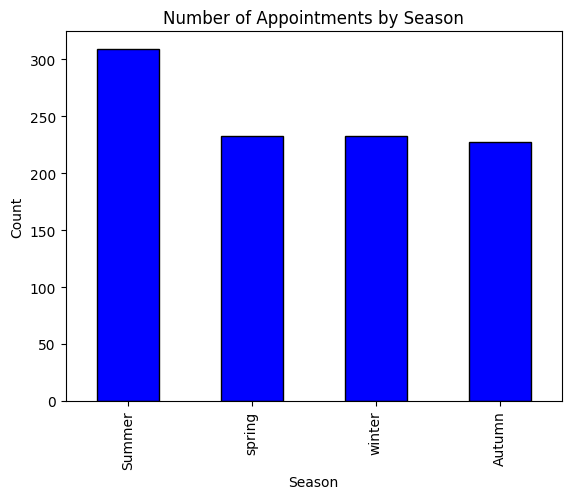

In [19]:
merge_data['season'].value_counts().plot(kind='bar', color='blue',edgecolor='black')
plt.title("Number of Appointments by Season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()


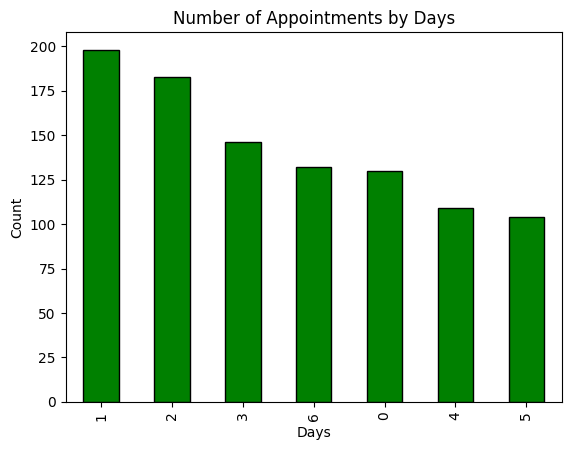

In [20]:
merge_data['days_of_week'].value_counts().plot(kind='bar', color='green',edgecolor='black')
plt.title("Number of Appointments by Days")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()


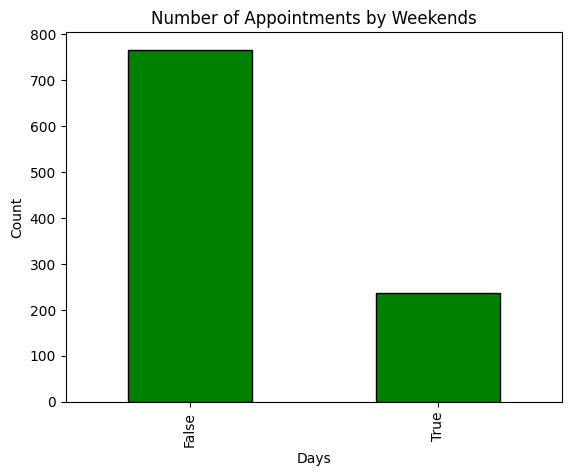

In [21]:
merge_data["is_weekend"].value_counts().plot(kind='bar', color='green',edgecolor='black')
plt.title("Number of Appointments by Weekends")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()


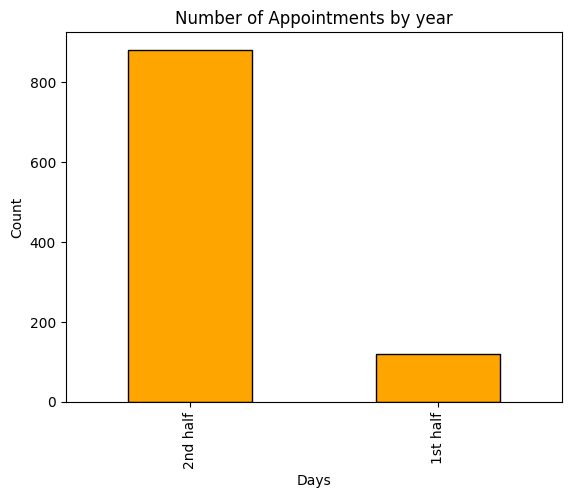

In [22]:
merge_data['year'].value_counts().plot(kind='bar', color='orange',edgecolor='black')
plt.title("Number of Appointments by year")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()


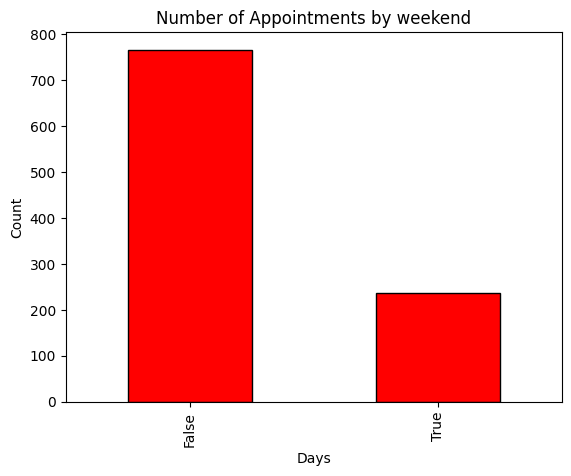

In [23]:
merge_data['is_weekend'].value_counts().plot(kind='bar', color='red',edgecolor='black')
plt.title("Number of Appointments by weekend")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()


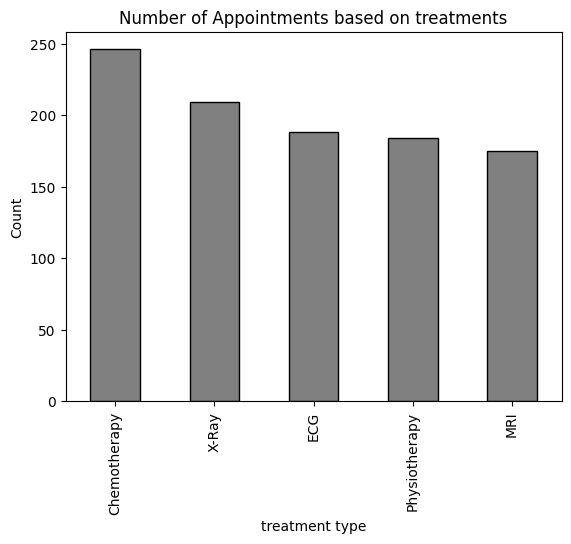

In [24]:
merge_data['treatment_type'].value_counts().plot(kind='bar', color='grey',edgecolor='black')
plt.title("Number of Appointments based on treatments")
plt.xlabel("treatment type")
plt.ylabel("Count")
plt.show()


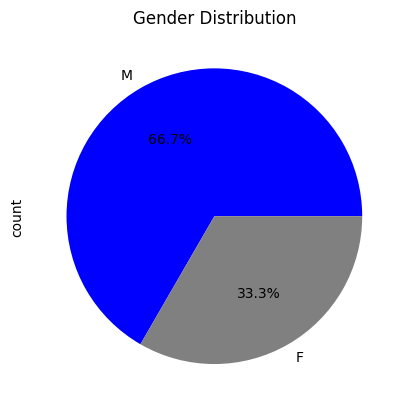

In [25]:
merge_data['gender_x'].value_counts().plot(kind='pie',colors=['blue','grey'],autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

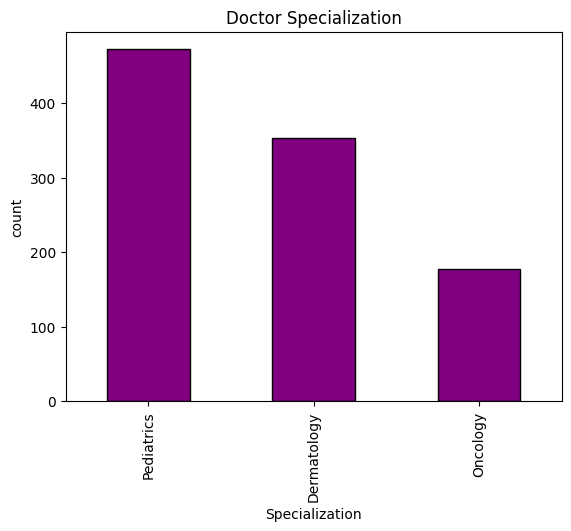

In [26]:
merge_data['specialization'].value_counts().plot(kind='bar',color='purple',edgecolor='black')
plt.title('Doctor Specialization')
plt.xlabel('Specialization')
plt.ylabel('count')
plt.show()

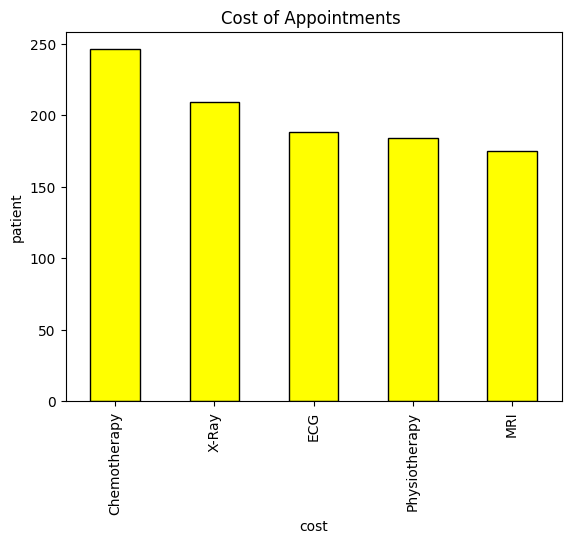

In [27]:
merge_data['treatment_type'].value_counts().plot(kind='bar', color='yellow',edgecolor='black')
plt.title("Cost of Appointments ")
plt.xlabel("cost")
plt.ylabel("patient")
plt.show()


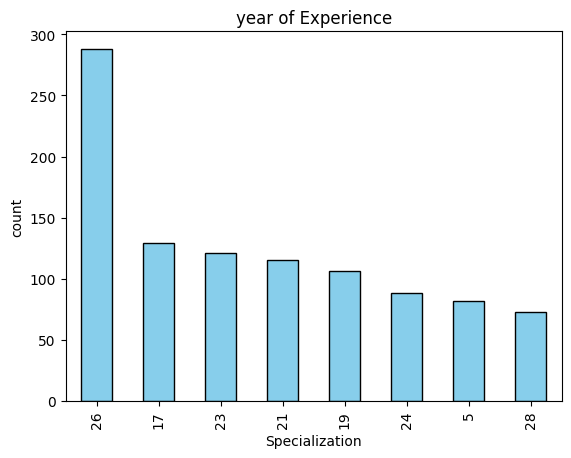

In [28]:
merge_data['years_experience'].value_counts().plot(kind='bar',color='skyblue',edgecolor='black')
plt.title('year of Experience')
plt.xlabel('Specialization')
plt.ylabel('count')
plt.show()

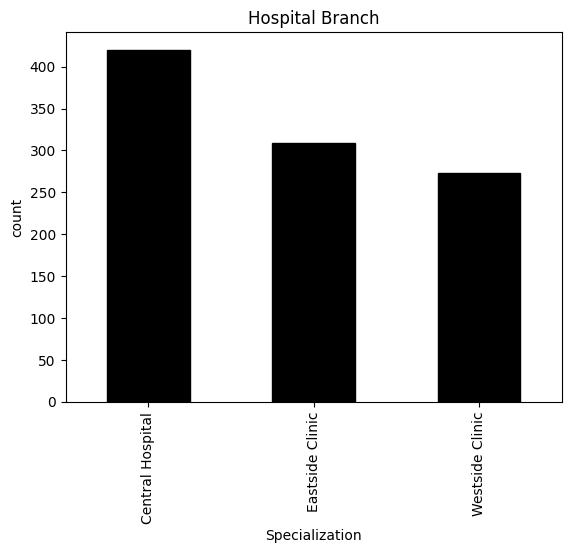

In [29]:
'hospital_branch'
merge_data['hospital_branch'].value_counts().plot(kind='bar',color='black',edgecolor='black')
plt.title('Hospital Branch')
plt.xlabel('Specialization')
plt.ylabel('count')
plt.show()

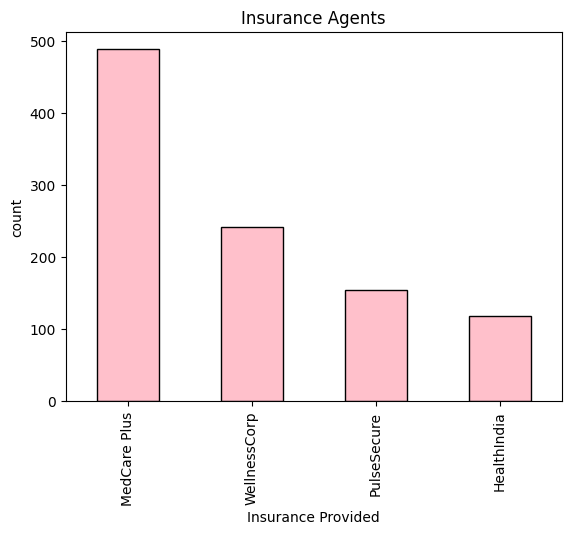

In [30]:
merge_data['insurance_provider_x'].value_counts().plot(kind='bar',color='Pink',edgecolor='black')
plt.title('Insurance Agents')
plt.xlabel('Insurance Provided')
plt.ylabel('count')
plt.show()

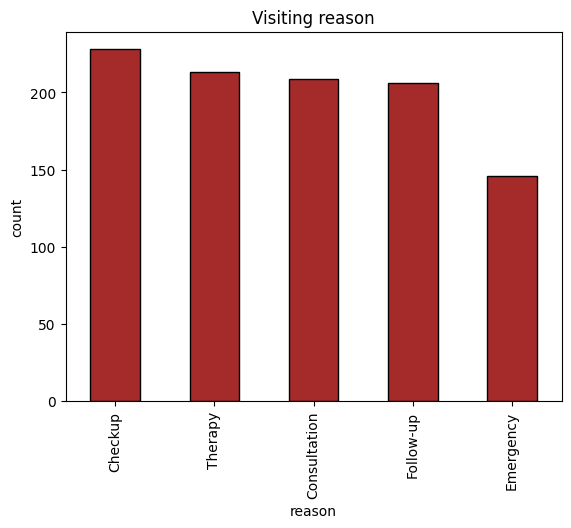

In [31]:
merge_data['reason_for_visit'].value_counts().plot(kind='bar',color='brown',edgecolor='black')
plt.title('Visiting reason')
plt.xlabel('reason')
plt.ylabel('count')
plt.show()

# Predictions

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Model

In [33]:
# Ensure the 'status' column exists and clean it
merge_data['status'] = merge_data['status'].str.strip().str.lower()

# Now create the 'no_show' column correctly
merge_data['no_show'] = merge_data['status'].apply(lambda x: 1 if x == 'showed up' else 0)

# Confirm it's created
print(merge_data['no_show'].value_counts())


no_show
0    1002
Name: count, dtype: int64


In [34]:
from sklearn.model_selection import train_test_split

y = merge_data['no_show']
x = merge_data[['days_of_week', 'is_weekend', 'cost']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


# RandomForestClassifiers

In [35]:
from sklearn.ensemble import RandomForestClassifier  # Make sure this import is present

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Predict on the test set
y_pred=model.predict(X_test)

#Evaluvate the Model
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy:.2f}")

#More Detailed  Evaluvation
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy:1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       201

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201

[[201]]


In [37]:
y.value_counts()

no_show
0    1002
Name: count, dtype: int64

# Visulization

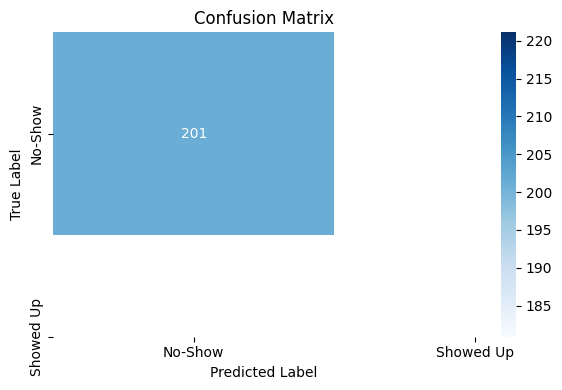

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No-Show', 'Showed Up'], yticklabels=['No-Show', 'Showed Up'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


                              Healthcare No-Show Prediction Report
**Introduction**
            This project analyzes healthcare appointment data to predict whether a patient will show up for their scheduled appointment using machine learning techniques.

**Abstract**
     Missed appointments are costly for healthcare providers. By identifying key predictors such as day of the week, weekend status, and appointment cost, this analysis helps optimize scheduling and resource allocation.
   

**Tools Used**
Python (Pandas, Scikit-learn, Seaborn, Matplotlib)
Kaggle Notebook
Machine Learning Algorithms (Random Forest)
Power BI for interactive dashboards

**Steps Involved in Building the Project**
**Data Collection:** Merged appointment, patient, doctor, billing, and treatment datasets
appointments.info() ,billing.info() ,doctors.info(),patients.info(), treatments.info() to   merge_data()
**Data Preprocessing**: Cleaned null values, normalized status, encoded categorical features.
**Feature Engineering:** Extracted 'days_of_week', 'is_weekend', and treatment costs
**Model Training:** Used Random Forest Classifier with train-test split and stratification.
**Evaluation:** Evaluated with accuracy, confusion matrix, and classification report
**Visualization:** Visualized prediction performance using confusion matrix heatmap


**Conclusion**
          The trained Random Forest model achieved high accuracy in predicting patient attendance. This solution aids in reducing missed appointments, improving clinic efficiency, and enhancing patient care.
       
